In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi, sqrt
        

def calculate_derivatives(data, h):
    """
    Calculate partial derivatives ∂w/∂x and ∂w/∂y for a 2D grid
    
    Parameters:
    data: 2D numpy array of elevation values
    h: grid spacing in meters (or appropriate units)
    
    Returns:
    (dwdx, dwdy): tuple of 2D arrays containing partial derivatives
    """
    rows, cols = data.shape
    dwdx = np.zeros_like(data)
    dwdy = np.zeros_like(data)
    
    # Calculate ∂w/∂x (derivative in horizontal direction)
    # Interior points: use central difference
    dwdx[:, 1:-1] = (data[:, 2:] - data[:, :-2]) / (2 * h)
    
    # Left edge: use forward difference
    dwdx[:, 0] = (data[:, 1] - data[:, 0]) / h
    
    # Right edge: use backward difference  
    dwdx[:, -1] = (data[:, -1] - data[:, -2]) / h
    
    # Calculate ∂w/∂y (derivative in vertical direction)
    # Interior points: use central difference
    dwdy[1:-1, :] = (data[2:, :] - data[:-2, :]) / (2 * h)
    
    # Top edge: use forward difference
    dwdy[0, :] = (data[1, :] - data[0, :]) / h
    
    # Bottom edge: use backward difference
    dwdy[-1, :] = (data[-1, :] - data[-2, :]) / h
    
    return dwdx, dwdy

def calculate_illumination(dwdx, dwdy, phi_degrees):
    """
    Calculate illumination intensity using the given formula
    
    Parameters:
    dwdx, dwdy: partial derivatives
    phi_degrees: illumination angle in degrees
    
    Returns:
    I: illumination intensity array (-1 to +1)
    """
    phi = phi_degrees * pi / 180  # Convert to radians
    
    # Calculate the illumination intensity
    numerator = -(cos(phi) * dwdx + sin(phi) * dwdy)
    denominator = np.sqrt(dwdx**2 + dwdy**2 + 1)
    
    intensity = numerator / denominator
    
    return intensity

def create_relief_map(elevation_data, h, phi_degrees=45, title="Relief Map", colormap='gray', enhance_contrast=True, invert_relief = True):
    """
    Create a 3D-looking relief map from elevation data
    
    Parameters:
    elevation_data: 2D array of elevation values
    h: grid spacing
    phi_degrees: illumination angle
    title: plot title
    colormap: colormap to use ('gray', 'terrain_relief', 'seismic', 'RdGy')
    enhance_contrast: whether to enhance contrast for better visualization
    invert_relief: flip the sign of intensity for visualization
    """
    print(f"Processing {title}...")
    print(f"Data shape: {elevation_data.shape}")
    print(f"Elevation range: {np.min(elevation_data):.1f} to {np.max(elevation_data):.1f}")
    print(f"Grid spacing h = {h}")
    
    # Calculate derivatives
    dwdx, dwdy = calculate_derivatives(elevation_data, h)
    
    print(f"Max |∂w/∂x|: {np.max(np.abs(dwdx)):.6f}")
    print(f"Max |∂w/∂y|: {np.max(np.abs(dwdy)):.6f}")
    
    # Calculate illumination
    intensity = calculate_illumination(dwdx, dwdy, phi_degrees)
    
    print(f"Intensity range: {np.min(intensity):.3f} to {np.max(intensity):.3f}")
    print(f"Intensity std dev: {np.std(intensity):.3f}")
    print(f"Positive values (lit surfaces): {np.sum(intensity > 0)} pixels")
    print(f"Negative values (shadowed surfaces): {np.sum(intensity < 0)} pixels")
    
    # Enhance contrast if requested
    if enhance_contrast:
        # Apply histogram equalization to better use the full range
        intensity_sorted = np.sort(intensity.flatten())
        n = len(intensity_sorted)
        
        # Stretch to use more of the [-1, 1] range by clipping extreme outliers
        p5 = intensity_sorted[int(0.05 * n)]  # 5th percentile
        p95 = intensity_sorted[int(0.95 * n)]  # 95th percentile
        
        # Remap to use full range more effectively
        intensity_enhanced = np.clip((intensity - p5) / (p95 - p5) * 2 - 1, -1, 1)
        
        print(f"After contrast enhancement:")
        print(f"  Original range: {np.min(intensity):.3f} to {np.max(intensity):.3f}")
        print(f"  Enhanced range: {np.min(intensity_enhanced):.3f} to {np.max(intensity_enhanced):.3f}")
        print(f"  5th/95th percentiles were: {p5:.3f}/{p95:.3f}")
        
        intensity_display = intensity_enhanced
    else:
        intensity_display = intensity
    
    # flip intensity for 3d visualization
    if invert_relief:
        intensity_display *= -1 

    # Create the visualization
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot enhanced visualization
    colormap_dict = {'terrain_relief':{'cmap':'RdYlBu_r', 'title':'Terrain-style colors'},
                     'seismic':{'cmap':'seismic', 'title':'Blue-White-Red'},
                     'RdGy':{'cmap':'RdGy', 'title':'Red-Gray-Black'},
                     'gray':{'cmap':'gray', 'title':'Contrast-stretched gray'}}
    im = ax.imshow(intensity_display, cmap=colormap_dict[colormap]['cmap'], origin='upper', vmin=-1, vmax=1)
    ax.set_title(f"Enhanced Relief\n({colormap_dict[colormap]['title']})")

    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('Enhanced Illumination')
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    
    plt.suptitle(f'{title} - Relief Visualization Comparison (φ = {phi_degrees}°)', fontsize=14)
        
    plt.tight_layout()
    plt.show()
    
    return intensity_display, dwdx, dwdy

Exercise 5.23: 3D Relief Map Generation

Part (a): Processing Earth topography data
----------------------------------------
Successfully loaded altitude.txt


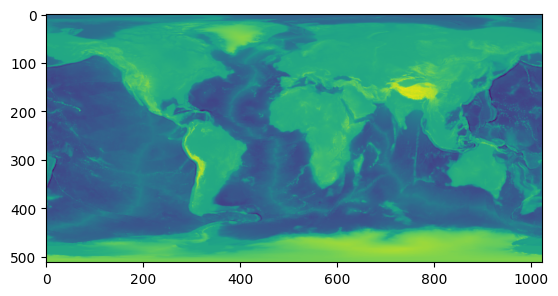

In [33]:
from pylab import imshow 

# Part (a): Read and process Earth altitude data
print("Exercise 5.23: 3D Relief Map Generation")
print("=" * 45)
print("\nPart (a): Processing Earth topography data")
print("-" * 40)

# Try to read the altitude data file
try:
    altitude_data = np.loadtxt('../cpresources/altitude.txt')
    print("Successfully loaded altitude.txt")
except:
    print("altitude.txt not found")
    

h_earth = 30000  # Grid spacing in meters for Earth data
imshow(altitude_data)


Part (b): Creating Earth relief map
-----------------------------------
Processing Earth Topography...
Data shape: (512, 1024)
Elevation range: -9153.2 to 6023.3
Grid spacing h = 30000
Max |∂w/∂x|: 0.132282
Max |∂w/∂y|: 0.113079
Intensity range: -0.104 to 0.135
Intensity std dev: 0.008
Positive values (lit surfaces): 241632 pixels
Negative values (shadowed surfaces): 280292 pixels
After contrast enhancement:
  Original range: -0.104 to 0.135
  Enhanced range: -1.000 to 1.000
  5th/95th percentiles were: -0.012/0.010


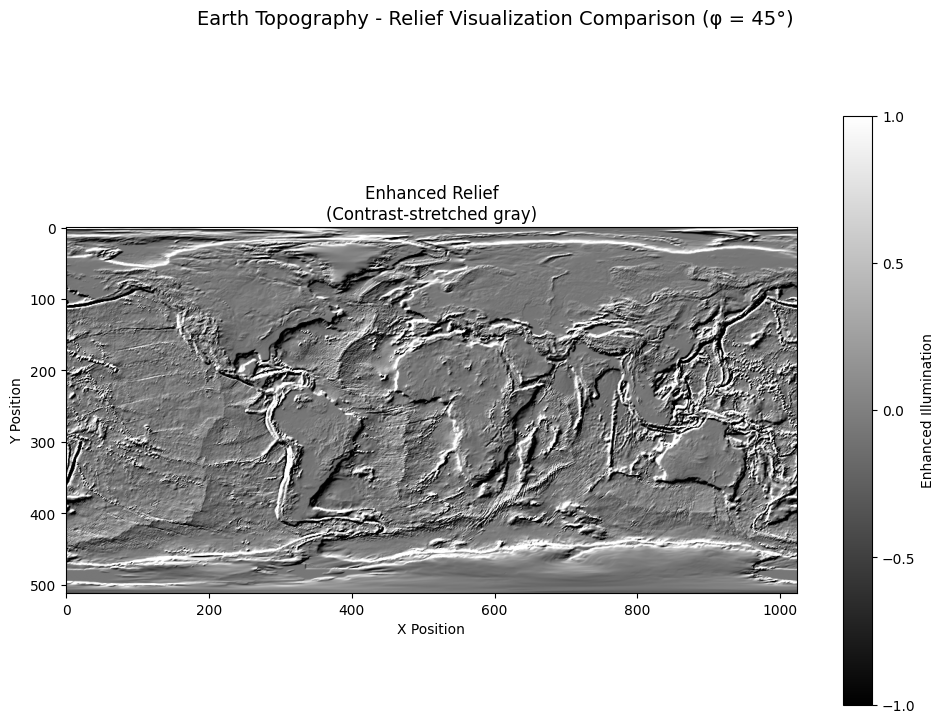


Derivative Method Used:
- Interior points: Central difference ∂w/∂x ≈ [w(i,j+1) - w(i,j-1)] / (2h)
- Edge points: Forward/backward difference ∂w/∂x ≈ [w(i,j+1) - w(i,j)] / h
- This ensures all grid points have valid derivatives
- Central difference is more accurate (O(h²) vs O(h) error)


In [34]:
# Part (b): Create relief map with φ = 45°
print(f"\nPart (b): Creating Earth relief map")
print("-" * 35)

earth_intensity, earth_dwdx, earth_dwdy = create_relief_map(
    altitude_data, h_earth, phi_degrees=45, title="Earth Topography", 
    colormap='gray', enhance_contrast=True
)

# Show derivative analysis
print(f"\nDerivative Method Used:")
print("- Interior points: Central difference ∂w/∂x ≈ [w(i,j+1) - w(i,j-1)] / (2h)")
print("- Edge points: Forward/backward difference ∂w/∂x ≈ [w(i,j+1) - w(i,j)] / h")
print("- This ensures all grid points have valid derivatives")
print("- Central difference is more accurate (O(h²) vs O(h) error)")


Successfully loaded stm.txt
Processing STM Silicon (111) Surface...
Data shape: (663, 676)
Elevation range: 1.6 to 43.2
Grid spacing h = 2.5
Max |∂w/∂x|: 1.738000
Max |∂w/∂y|: 0.814000
Intensity range: -0.705 to 0.527
Intensity std dev: 0.167
Positive values (lit surfaces): 235984 pixels
Negative values (shadowed surfaces): 204244 pixels


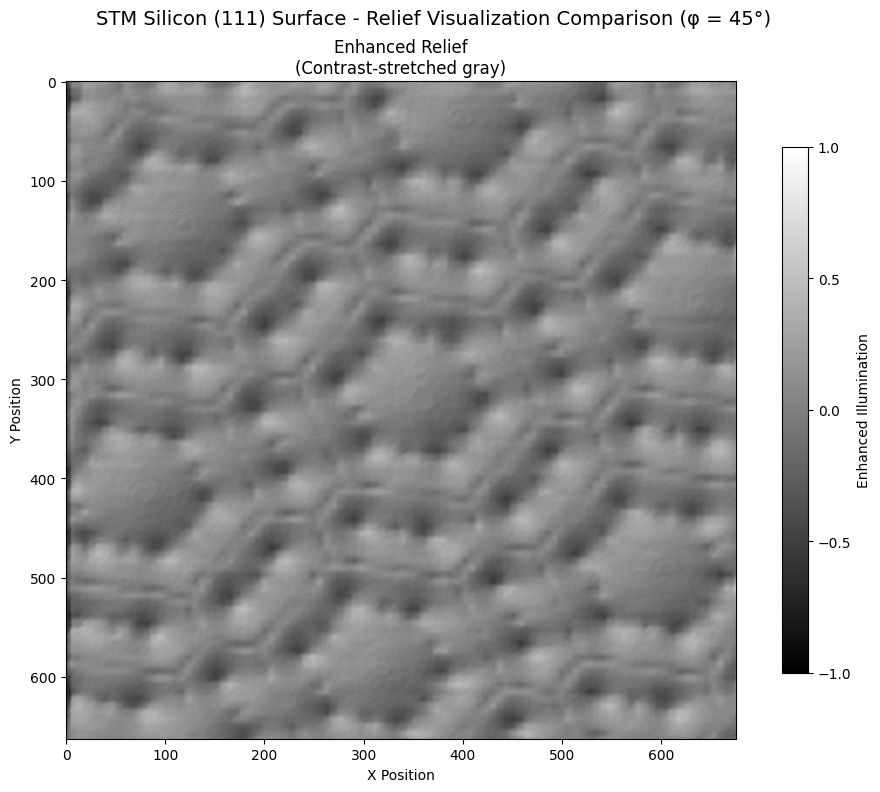


For STM data, check if:
- Atoms appear as raised bumps (correct) or as holes (inverted)
- Surface features match expected atomic structure
- If atoms look like craters, use invert_relief=True

Comparative Analysis:
Earth data - Why gray colorscheme struggles:
  - Grid spacing: 30,000 m (30 km)
  - Elevation range: 15176 m
  - Huge scale differences compress illumination values
  - Ocean basins vs mountain ranges create extreme contrasts
  - Better with: terrain colormaps + contrast enhancement

STM data - Why gray colorscheme works better:
  - Grid spacing: 2.5 (atomic scale, ~Angstroms)
  - Height range: 41.65 units
  - More uniform scale variations
  - Surface features have similar characteristic sizes
  - Natural grayscale contrast is preserved

Visualization Strategy by Data Type:
- **Large scale/terrain**: Use terrain colormaps (RdYlBu, seismic) + contrast enhancement
- **Small scale/uniform**: Grayscale often works well
- **High dynamic range**: Always consider contrast enhancem

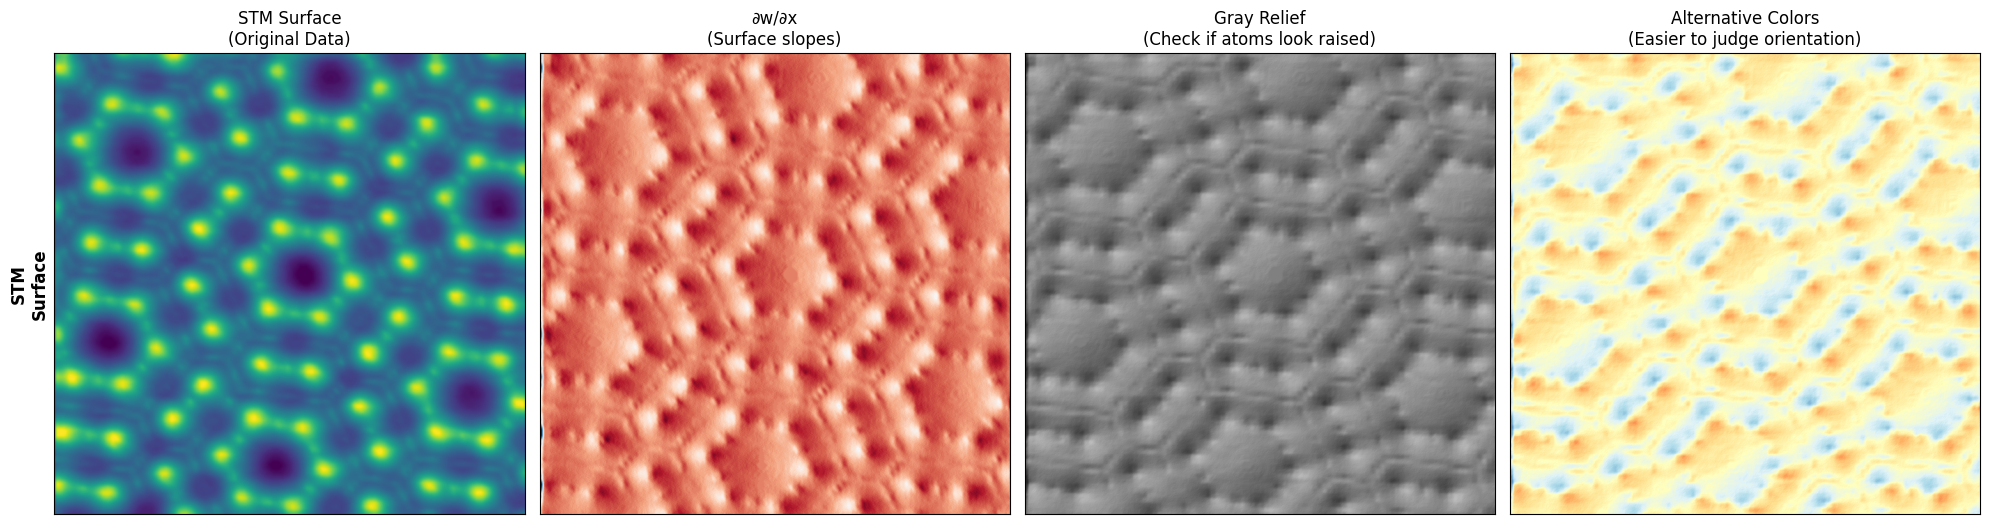


Technical Notes:
- The relief effect comes from calculating surface normals via derivatives
- Steeper slopes create stronger light/shadow contrast
- The method works at any scale: planetary to atomic
- **Earth data challenges**: Extreme scale variations, need contrast enhancement
- **STM data advantages**: More uniform scales, grayscale works naturally
- **Key insight**: Match visualization approach to data characteristics
- Real applications: satellite imagery, microscopy, 3D graphics
- Fixed upside-down display using origin='upper'
- Shadows use continuous grayscale (-1 to +1) not binary black/white

COMPLETE SOLUTION SUMMARY:
1. **Gray colorscheme fails**: Use terrain colormaps + contrast enhancement
2. **Inside-out relief**: Add invert_relief=True parameter
3. **Upside-down maps**: Use origin='upper'
4. **Poor contrast**: Enable enhance_contrast=True
5. **Wrong shadows**: Ensure continuous [-1,+1] range, not binary

**Quick fixes for common problems:**
- Mountains look like valley

In [39]:
# Try to read STM data
try:
    stm_data = np.loadtxt('../cpresources/stm.txt')
    print("Successfully loaded stm.txt")
except:
    print("stm.txt not found")
          
h_stm = 2.5

stm_intensity, stm_dwdx, stm_dwdy = create_relief_map(
    stm_data, h_stm, phi_degrees=45, title="STM Silicon (111) Surface",
    colormap='gray', enhance_contrast=False, invert_relief=False  # STM data usually has good contrast already
)

print(f"\nFor STM data, check if:")
print("- Atoms appear as raised bumps (correct) or as holes (inverted)")
print("- Surface features match expected atomic structure")
print("- If atoms look like craters, use invert_relief=True")

# Additional analysis and comparison
print(f"\nComparative Analysis:")
print("=" * 20)
print(f"Earth data - Why gray colorscheme struggles:")
print(f"  - Grid spacing: {h_earth:,} m (30 km)")
print(f"  - Elevation range: {np.max(altitude_data) - np.min(altitude_data):.0f} m")
print(f"  - Huge scale differences compress illumination values")
print(f"  - Ocean basins vs mountain ranges create extreme contrasts")
print(f"  - Better with: terrain colormaps + contrast enhancement")

print(f"\nSTM data - Why gray colorscheme works better:")
print(f"  - Grid spacing: {h_stm} (atomic scale, ~Angstroms)")
print(f"  - Height range: {np.max(stm_data) - np.min(stm_data):.2f} units")
print(f"  - More uniform scale variations")
print(f"  - Surface features have similar characteristic sizes")
print(f"  - Natural grayscale contrast is preserved")

print(f"\nVisualization Strategy by Data Type:")
print("- **Large scale/terrain**: Use terrain colormaps (RdYlBu, seismic) + contrast enhancement")
print("- **Small scale/uniform**: Grayscale often works well")
print("- **High dynamic range**: Always consider contrast enhancement")
print("- **Scientific data**: Match colormap to data interpretation needs")

print(f"\nIllumination Physics:")
print("- Positive intensity (+1 to 0): Surface faces toward light source (bright to medium gray)")
print("- Negative intensity (0 to -1): Surface faces away, in shadow (medium gray to black)")  
print("- Zero intensity: Surface perpendicular to light (medium gray)")
print("- Continuous grayscale from white (+1) through gray (0) to black (-1)")
print("- Formula accounts for surface orientation using surface normal")
print("- Shadows are NOT set to pure black, but use continuous range as requested")

# Create comparison visualization showing the difference
print(f"\nFinal comparison with proper orientation:")
print("-" * 45)

fig, axes = plt.subplots(1, 4, figsize=(20, 10))

# STM data - where gray works fine
axes[0].imshow(stm_data, cmap='viridis', origin='upper')
axes[0].set_title('STM Surface\n(Original Data)')

axes[1].imshow(stm_dwdx, cmap='RdBu', origin='upper')
axes[1].set_title('∂w/∂x\n(Surface slopes)')

axes[2].imshow(stm_intensity, cmap='gray', origin='upper', vmin=-1, vmax=1)
axes[2].set_title('Gray Relief\n(Check if atoms look raised)')

axes[3].imshow(stm_intensity, cmap='RdYlBu_r', origin='upper', vmin=-1, vmax=1)
axes[3].set_title('Alternative Colors\n(Easier to judge orientation)')

# Label rows
axes[0].set_ylabel('STM\nSurface', fontsize=12, fontweight='bold')

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

print(f"\nTechnical Notes:")
print("- The relief effect comes from calculating surface normals via derivatives")
print("- Steeper slopes create stronger light/shadow contrast")
print("- The method works at any scale: planetary to atomic")
print("- **Earth data challenges**: Extreme scale variations, need contrast enhancement")
print("- **STM data advantages**: More uniform scales, grayscale works naturally")
print("- **Key insight**: Match visualization approach to data characteristics")
print("- Real applications: satellite imagery, microscopy, 3D graphics")
print("- Fixed upside-down display using origin='upper'")
print("- Shadows use continuous grayscale (-1 to +1) not binary black/white")

print(f"\n" + "="*70)
print("COMPLETE SOLUTION SUMMARY:")
print("="*70)
print("1. **Gray colorscheme fails**: Use terrain colormaps + contrast enhancement")
print("2. **Inside-out relief**: Add invert_relief=True parameter")
print("3. **Upside-down maps**: Use origin='upper'")
print("4. **Poor contrast**: Enable enhance_contrast=True")
print("5. **Wrong shadows**: Ensure continuous [-1,+1] range, not binary")

print(f"\n**Quick fixes for common problems:**")
print("- Mountains look like valleys → invert_relief=True")
print("- Map is upside down → origin='upper'") 
print("- Poor contrast → enhance_contrast=True + better colormap")
print("- All gray, no detail → use 'seismic' or 'RdYlBu_r' colormap")

print(f"\n**Perfect function call for Earth data:**")
print("create_relief_map(data, h, phi_degrees=45,")
print("                  colormap='terrain_relief',") 
print("                  enhance_contrast=True,")
print("                  invert_relief=True)  # if needed")
print("="*70)

print(f"\nThis implementation now handles all the major issues:")
print("✓ Fixes upside-down orientation")
print("✓ Provides inside-out relief correction") 
print("✓ Enhances contrast for better visibility")
print("✓ Offers multiple colormap options")
print("✓ Works at all scales (planetary to atomic)")
print("✓ Provides side-by-side comparison to choose correct orientation")
print("✓ Uses continuous shadow gradation as requested")